<a href="https://colab.research.google.com/github/harshit57709/AI/blob/master/Classifying_road_signs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!git clone https://bitbucket.org/jadslim/german-traffic-signs

Cloning into 'german-traffic-signs'...
remote: Counting objects: 6, done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 6 (delta 0), reused 0 (delta 0)
Unpacking objects: 100% (6/6), done.


In [0]:
!ls german-traffic-signs

signnames.csv  test.p  train.p	valid.p


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.layers import Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import random
import pandas as pd
import pickle

Using TensorFlow backend.


In [0]:
np.random.seed(0)

In [0]:
with open('german-traffic-signs/train.p','rb') as f:
  train_data = pickle.load(f)

In [0]:
with open('german-traffic-signs/test.p','rb') as f:
  test_data = pickle.load(f)

In [0]:
with open('german-traffic-signs/valid.p','rb') as f:
  val_data = pickle.load(f)

In [0]:
train_data.keys()

dict_keys(['coords', 'labels', 'features', 'sizes'])

In [0]:
X_train, y_train = train_data['features'], train_data['labels']
X_val, y_val = val_data['features'], val_data['labels']
X_test, y_test = test_data['features'], test_data['labels']

In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(width_shift_range=0.1,
                   height_shift_range=0.1,
                   zoom_range=0.2,
                   shear_range=0.1,
                   rotation_range=10
                   )
datagen.fit(X_train)

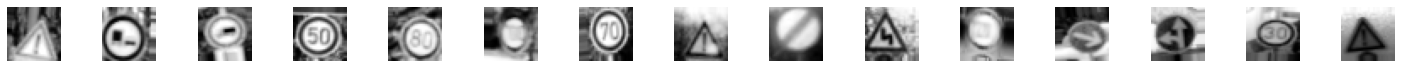

In [0]:
batches= datagen.flow(X_train, y_train, batch_size=20)

X_batch , y_batch = next(batches)

fig, axs = plt.subplots(1, 15, figsize = (20, 5))
fig.tight_layout()
for i in range(15):
  axs[i].imshow(X_batch[i].reshape(32, 32), cmap = plt.get_cmap('gray'))
  axs[i].axis('off')

In [0]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(34799, 32, 32, 3)
(4410, 32, 32, 3)
(12630, 32, 32, 3)


In [0]:
assert(X_train.shape[0]==y_train.shape[0]), "The no. of images is not equal to no of labels(train)"
assert(X_test.shape[0]==y_test.shape[0]), "The no. of images is not equal to no of labels(test)"
assert(X_val.shape[0]==y_val.shape[0]), "The no. of images is not equal to no of labels(val)"
assert(X_train.shape[1:]==(32, 32, 3)), "Dimensions not match"

In [0]:
data = pd.read_csv("german-traffic-signs/signnames.csv")

In [0]:
data.head()


,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)


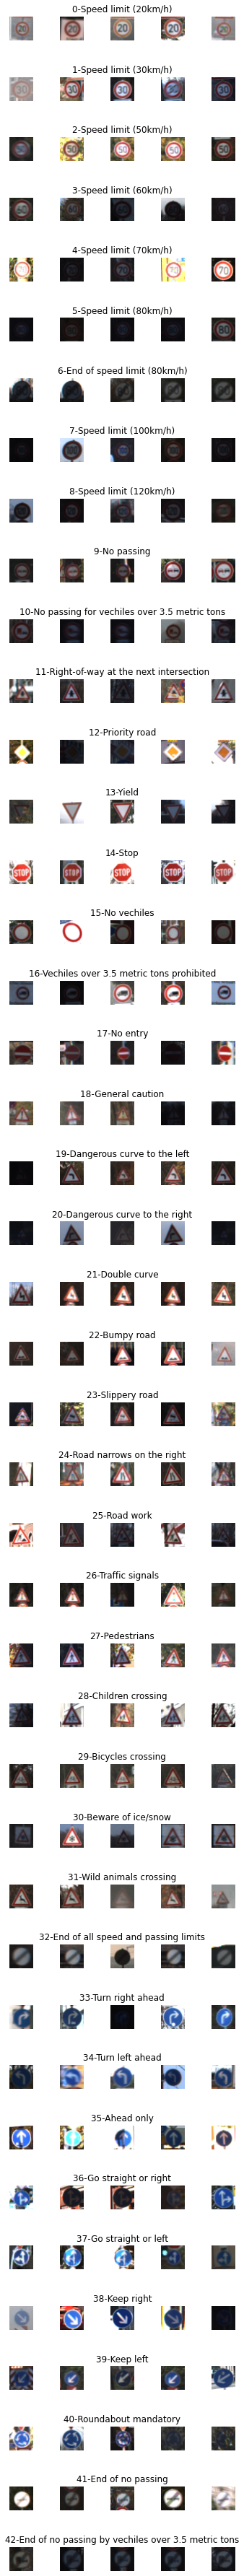

In [0]:
cols=5
num_of_samples =[]
num_classes = 43
fig, axs = plt.subplots(nrows= num_classes, ncols=cols, figsize= (5,50))
fig.tight_layout()
for i, name in data.iterrows():
  for j in range(cols):
    selected = X_train[y_train==i]
    axs[i][j].imshow(selected[random.randint(0, len(selected)-1), :, :,:])
    axs[i][j].axis('off')
    if j==2:
      axs[i][j].set_title(str(i) + '-' + str(name['SignName']))
      num_of_samples.append(len(selected))

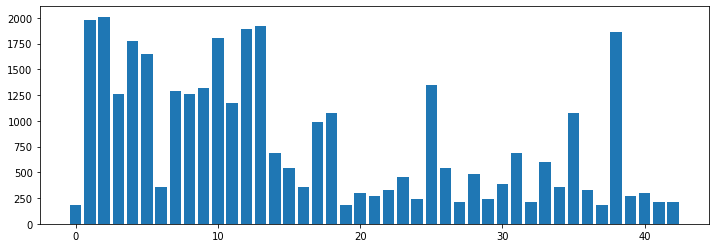

In [0]:
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes),num_of_samples)
plt.show()

In [0]:
import cv2

(32, 32, 3)

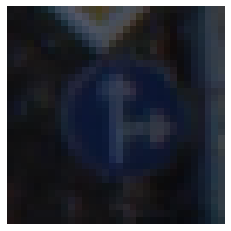

In [0]:
plt.imshow(X_train[1000])
plt.axis('off')
X_train[1001].shape

In [0]:
def gray_scale(img):
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  return img

(32, 32)

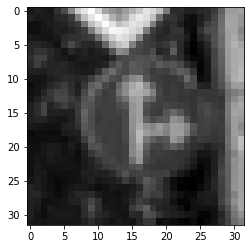

In [0]:
img = gray_scale(X_train[1000])
plt.imshow(img, cmap = plt.get_cmap('gray'))
img.shape

In [0]:
def equalize(img):
  img = cv2.equalizeHist(img)
  return img

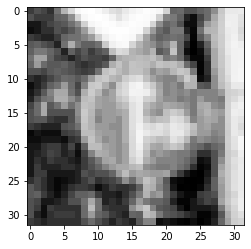

In [0]:
img = equalize(img)
plt.imshow(img, cmap = plt.get_cmap('gray'))

In [0]:
def preprocessing(img):
  img = gray_scale(img)
  img = equalize(img)
  img = img/255
  return img

In [0]:
X_train = np.array(list(map(preprocessing, X_train)))
X_test = np.array(list(map(preprocessing, X_test)))
X_val = np.array(list(map(preprocessing, X_val)))

In [0]:
X_train[1000].shape

(32, 32)

In [0]:
X_val.shape

(4410, 32, 32)

In [0]:
X_train= X_train.reshape(34799, 32, 32, 1)
X_test= X_test.reshape(12630, 32, 32, 1)
X_val =X_val.reshape(4410, 32, 32, 1)

In [0]:
X_train.shape

(34799, 32, 32, 1)

In [0]:
y_train, y_test, y_val = to_categorical(y_train, 43),to_categorical(y_test, 43), to_categorical(y_val, 43) 

In [0]:
# def leNet():
#   model = Sequential()
#   model.add(Conv2D(60, (5 ,5), input_shape = (32, 32, 1), activation = "relu"))
#   #no padding nedded
#   model.add(MaxPooling2D(pool_size = (2, 2)))
#   model.add(Conv2D(30, (3, 3), activation="relu"))
#   model.add(MaxPooling2D(pool_size = (2, 2)))
#   model.add(Flatten())
#   model.add(Dense(500, activation="relu"))
#   model.add(Dropout(0.5))
#   model.add(Dense(num_classes, activation="softmax"))
#   model.compile(Adam(lr=0.001), loss="categorical_crossentropy", metrics = ["accuracy"])
#   return model

In [0]:
def modified_model():
  model = Sequential()
  model.add(Conv2D(60, (5 ,5), input_shape = (32, 32, 1), activation = "relu"))#no padding nedded
  model.add(Conv2D(60, (5, 5), activation="relu"))
  model.add(MaxPooling2D(pool_size = (2, 2)))

  model.add(Conv2D(30, (3, 3), activation="relu"))
  model.add(Conv2D(30, (3, 3), activation="relu"))
  model.add(MaxPooling2D(pool_size = (2, 2)))
  #model.add(Dropout(0.5))

  model.add(Flatten())
  model.add(Dense(500, activation="relu"))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes, activation="softmax"))
  model.compile(Adam(lr=0.001), loss="categorical_crossentropy", metrics = ["accuracy"])
  return model

In [0]:
# model = leNet()
model = modified_model()

In [0]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 28, 28, 60)        1560      
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 24, 24, 60)        90060     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 12, 12, 60)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 10, 10, 30)        16230     
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 8, 8, 30)          8130      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 4, 4, 30)          0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 480)              

In [0]:
history =model.fit_generator(datagen.flow(X_train, y_train, batch_size=50), steps_per_epoch=2000, epochs =10, validation_data=(X_val, y_val), shuffle=1)

Epoch 1/10
2000/2000 [==============================] - 35s 18ms/step - loss: 0.9037 - accuracy: 0.7357 - val_loss: 0.0886 - val_accuracy: 0.9748
Epoch 2/10
2000/2000 [==============================] - 35s 17ms/step - loss: 0.2362 - accuracy: 0.9262 - val_loss: 0.0460 - val_accuracy: 0.9866
Epoch 3/10
2000/2000 [==============================] - 35s 17ms/step - loss: 0.1620 - accuracy: 0.9494 - val_loss: 0.0375 - val_accuracy: 0.9889
Epoch 4/10
2000/2000 [==============================] - 35s 17ms/step - loss: 0.1250 - accuracy: 0.9610 - val_loss: 0.0347 - val_accuracy: 0.9914
Epoch 5/10
2000/2000 [==============================] - 35s 17ms/step - loss: 0.1045 - accuracy: 0.9682 - val_loss: 0.0438 - val_accuracy: 0.9871
Epoch 6/10
2000/2000 [==============================] - 35s 17ms/step - loss: 0.0926 - accuracy: 0.9713 - val_loss: 0.0313 - val_accuracy: 0.9912
Epoch 7/10
2000/2000 [==============================] - 35s 18ms/step - loss: 0.0843 - accuracy: 0.9737 - val_loss: 0.0273 -

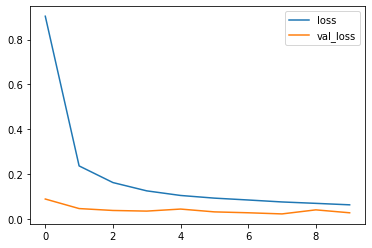

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','val_loss'])


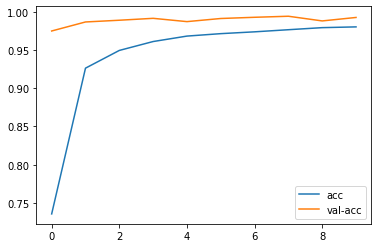

In [0]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['acc','val-acc'])

In [0]:
score = model.evaluate(X_test, y_test, verbose=0)
print(score[0])
print(score[1])

0.13347571460023702
0.969437837600708


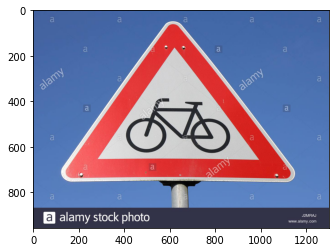

In [0]:
 
import requests
from PIL import Image
url = 'https://c8.alamy.com/comp/J2MRAJ/german-road-sign-bicycles-crossing-J2MRAJ.jpg'
r = requests.get(url, stream=True)
img = Image.open(r.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))

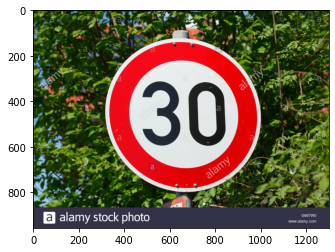

In [0]:
url = 'https://c8.alamy.com/comp/G667W0/road-sign-speed-limit-30-kmh-zone-passau-bavaria-germany-G667W0.jpg'
r = requests.get(url, stream=True)
img = Image.open(r.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))

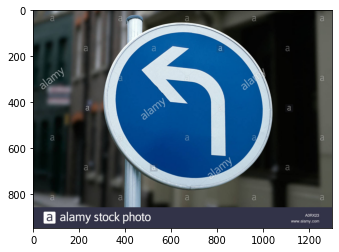

In [0]:
url = 'https://c8.alamy.com/comp/A0RX23/cars-and-automobiles-must-turn-left-ahead-sign-A0RX23.jpg'
r = requests.get(url, stream=True)
img = Image.open(r.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))



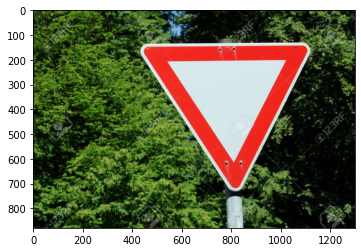

In [0]:
url = 'https://previews.123rf.com/images/pejo/pejo0907/pejo090700003/5155701-german-traffic-sign-no-205-give-way.jpg.jpg'
r = requests.get(url, stream=True)
img = Image.open(r.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))


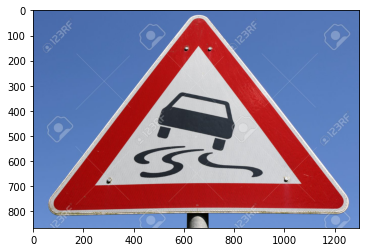

In [0]:
url = 'https://previews.123rf.com/images/bwylezich/bwylezich1608/bwylezich160800375/64914157-german-road-sign-slippery-road.jpg'
r = requests.get(url, stream=True)
img = Image.open(r.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))

(32, 32)


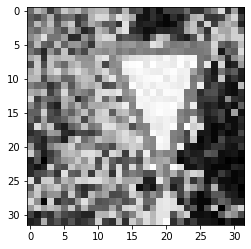

In [0]:
#Preprocess image
img = np.asarray(img)
img = cv2.resize(img, (32, 32))
img = preprocessing(img)
plt.imshow(img, cmap = plt.get_cmap('gray'))
print(img.shape)

In [0]:
#Reshape reshape
 
img = img.reshape(1, 32, 32, 1)
 
#Test image
print("predicted sign: "+ str(model.predict_classes(img)))

predicted sign: [13]


In [0]:
data

,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)
5,5,Speed limit (80km/h)
6,6,End of speed limit (80km/h)
7,7,Speed limit (100km/h)
8,8,Speed limit (120km/h)
9,9,No passing
